1. 데이터 불러오기 및  DataFrame으로 저장 
2. FCM ( Fuzzy )
3. K-means++ 적용 및 시각화
    - train case에 적용
    - test case에 적용
4. 확률 저장

In [ ]:
# !pip install fuzzy-c-means

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import pickle

import matplotlib.pyplot as plt

## 데이터 불러오기 및  DataFrame으로 저장

In [2]:
with open("dic_minmax.pickle", "rb") as handle:
    dic_minmax = pickle.load(handle)
print( dic_minmax.keys() )
print( len(dic_minmax['path']) )

dict_keys(['x_max', 'y_max', 'z_max', 'x_min', 'y_min', 'z_min', 'sum_max', 'sum_min', 'path'])
58631


In [3]:
with open("dic_minmax_test.pickle", "rb") as handle:
    dic_test = pickle.load(handle)
print( dic_test.keys() )
print( len(dic_test['path']) )

dict_keys(['x_max', 'y_max', 'z_max', 'x_min', 'y_min', 'z_min', 'sum_max', 'sum_min', 'path'])
8744


In [4]:
df = pd.DataFrame({'x_max' : dic_minmax['x_max'],
                   'y_max' : dic_minmax['y_max'],
                   'z_max' : dic_minmax['z_max'],
                  'x_min' : dic_minmax['x_min'],
                  'y_min' : dic_minmax['y_min'],
                  'z_min' : dic_minmax['z_min'],
                  'sum_max' : dic_minmax['sum_max'], 
                  'sum_min' : dic_minmax['sum_min'] 
                  })
print(len(df))

df_test = pd.DataFrame({'x_max' : dic_test['x_max'],
                   'y_max' : dic_test['y_max'],
                   'z_max' : dic_test['z_max'],
                  'x_min' : dic_test['x_min'],
                  'y_min' : dic_test['y_min'],
                  'z_min' : dic_test['z_min'],
                  'sum_max' : dic_test['sum_max'], 
                  'sum_min' : dic_test['sum_min'] 
                  })
print(len(df_test))

df_test.head()

58631
8744


,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min
0,6.085938,6.125977,7.046875,-6.446289,-6.766602,-7.207031,1.081055,-2.402344
1,6.005859,6.045898,7.006836,-6.406250,-6.726562,-7.046875,1.081055,-2.322266
2,3.163086,3.323242,3.243164,-3.363281,-3.523438,-3.843750,-0.360352,-0.720703
3,6.526367,6.166016,6.846680,-6.846680,-7.006836,-6.926758,1.161133,-2.362305
4,12.972656,10.370117,12.091797,-13.092773,-10.570312,-12.732422,5.044922,-5.685547


## FCM ( Fuzzy C Means )

Fuzzy C Means을 적용해보았습니다.

In [5]:
from fcmeans import FCM

X = np.array([[key, dic_minmax['y_max'][i], dic_minmax['z_max'][i]] for i, key in enumerate(dic_minmax['x_max'])])

my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(X)

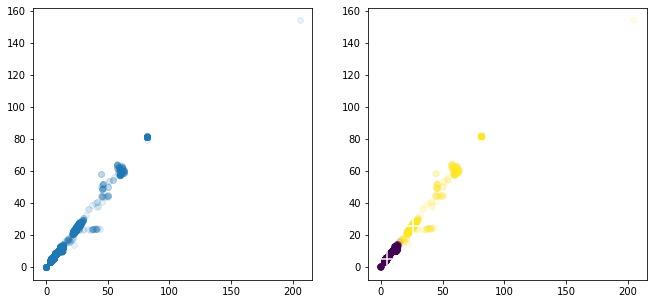

In [18]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=labels, alpha=.1)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='w')
plt.savefig('FCM-clustering-output.jpg')
plt.show()

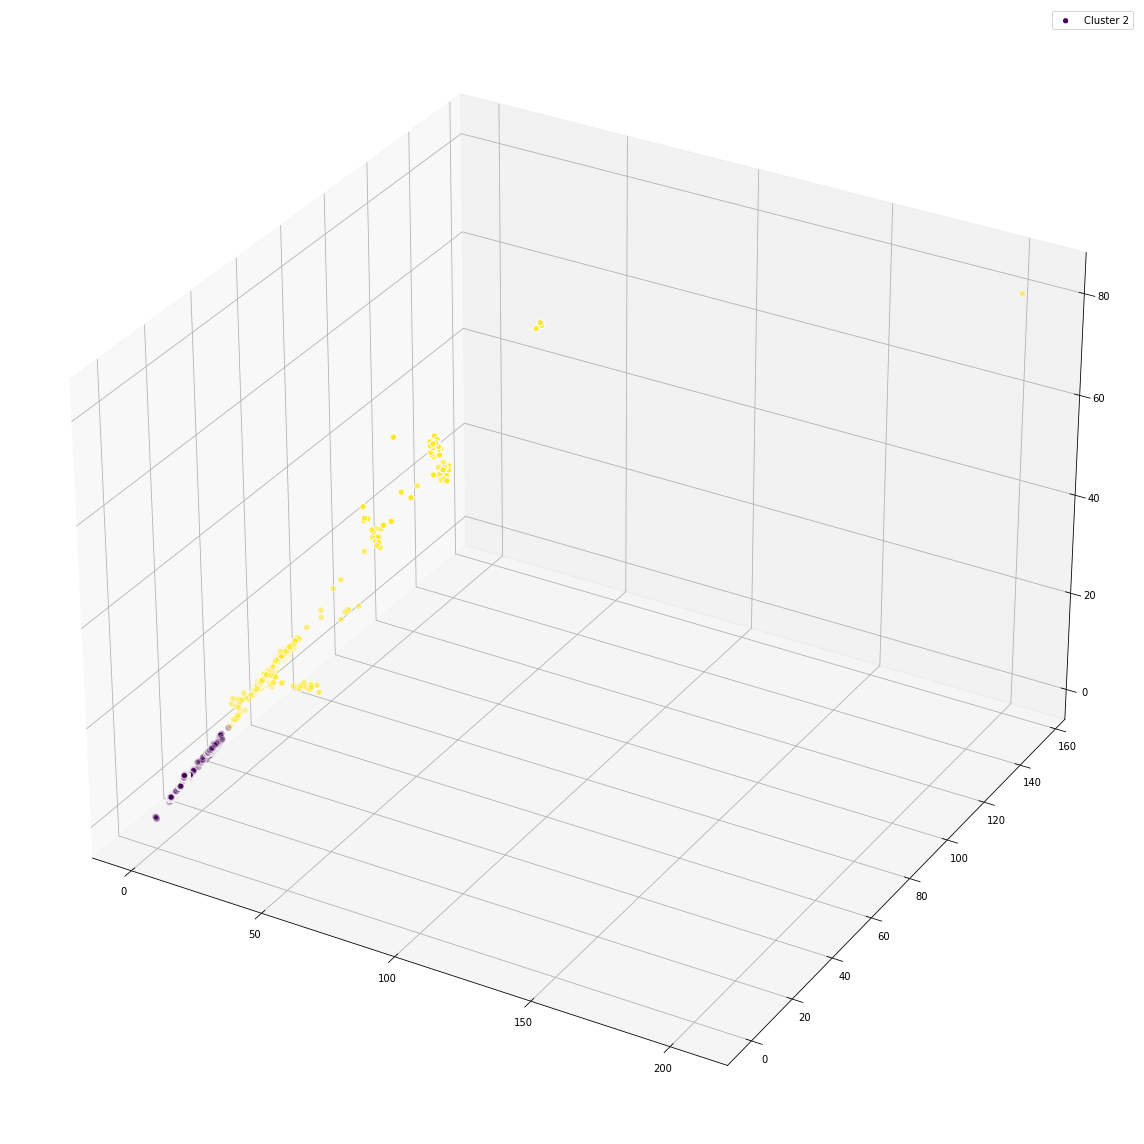

In [19]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['x_max'], df['y_max'],df['z_max'], c=labels, edgecolor='white', marker='o', s=40, label='Cluster 2')
plt.savefig('FCM-3D-clustering-output.jpg')
plt.legend()
plt.tight_layout()
plt.show()

## K-means++ 적용 및 시각화

### train case에 적용

사실 clustering에는 train case에 적용하는 것이 큰 의미를 가지지는 않는다. ( 정답이 없기 때문에 )
하이퍼파라미터를 큰 데이터에 적용한다고 생각하자.

Text(0, 0.5, 'sum_min')

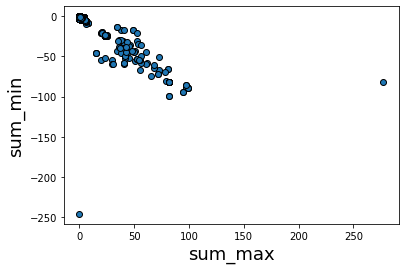

In [20]:
plt.scatter(df.sum_max, df.sum_min, edgecolor='black')
plt.xlabel('sum_max', fontsize=18)
plt.ylabel('sum_min', fontsize=18)

In [21]:
feature = ['sum_max', 'sum_min']
km = KMeans(n_clusters = 2, random_state=21)
km.fit(df[feature])

KMeans(n_clusters=2, random_state=21)

In [22]:
centers = km.cluster_centers_
print(centers)

[[  0.40859133  -1.3178888 ]
 [ 63.32433192 -62.86747996]]


Text(0.5, 1.0, 'K-means Clustering')

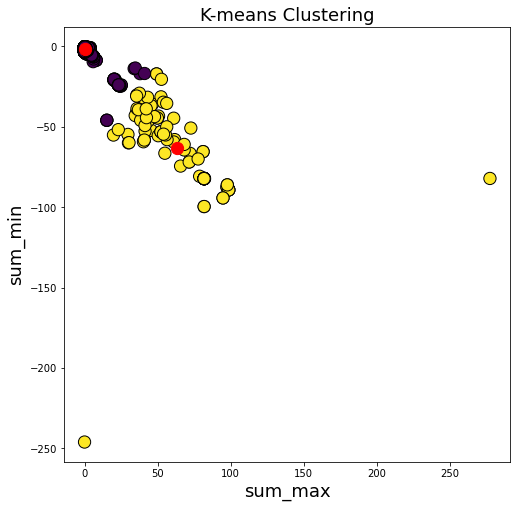

In [23]:
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 1, figsize=(8,8))
axes.scatter(df.sum_max, df.sum_min, c=new_labels, edgecolor='black', s=150)
axes.scatter(centers[:,0], centers[:,1], c='red', s=150)

axes.set_xlabel('sum_max', fontsize=18)
axes.set_ylabel('sum_min', fontsize=18)

# axes.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes.set_title('K-means Clustering', fontsize=18)

In [25]:
import math
def get_distance(dot, centers=centers) :
    x = dot.sum_max
    y = dot.sum_min
    return [math.sqrt((x - centers[0][0])**2 + (y-centers[0][1])**2 ), math.sqrt( (x - centers[1][0])**2 + (y-centers[1][1])**2 )] 

def get_probability(dist) :
    return [dist[1] / sum(dist), dist[0] / sum(dist) ]    # 1-dist[0] == dist[1]

In [26]:
df['distance'] = df[['sum_max', 'sum_min']].apply(get_distance, axis=1)
df['probability'] = df['distance'].apply(get_probability)
df.head(3)

,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min,distance,probability
0,5.054932,5.094971,5.094971,-5.475342,-5.635498,-5.155029,-0.250244,-0.890869,"[0.7851178069262584, 88.78528599873646]","[0.9912346291456976, 0.008765370854302464]"
1,4.043945,4.164062,4.003906,-3.923828,-4.364258,-4.204102,0.280273,-0.560547,"[0.7681355856474166, 88.63806868573617]","[0.9914084755984516, 0.008591524401548442]"
2,3.283203,3.483398,3.483398,-3.443359,-3.683594,-4.003906,-0.320312,-0.800781,"[0.8937007420053603, 88.89834560912283]","[0.9900469943795402, 0.00995300562045974]"


### test case에 적용

엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

(사실 이상치를 탐지하기 위해서 사용하는 것이라 대부분의 데이터가 모여있는 곳만 알아내면 된다. 따라서 최적의 k와 상관없이 최소한의 클러스터 개수인 2를 사용할 예정이다.)

In [33]:
feature = ['sum_max', 'sum_min']
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_test[feature])
    sum_of_squared_distances.append(km.inertia_)

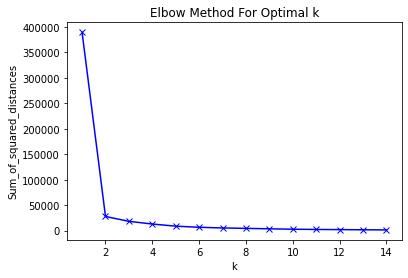

In [34]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
km = KMeans(n_clusters = 2)
km = km.fit(df_test[feature])

Text(0.5, 1.0, 'K-means Clustering')

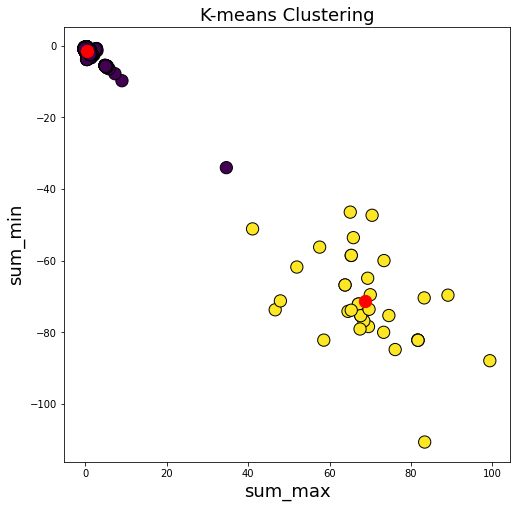

In [29]:
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 1, figsize=(8,8))
axes.scatter(df_test.sum_max, df_test.sum_min, c=new_labels, edgecolor='black', s=150)
axes.scatter(centers[:,0], centers[:,1], c='red', s=150)

axes.set_xlabel('sum_max', fontsize=18)
axes.set_ylabel('sum_min', fontsize=18)

# axes.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes.set_title('K-means Clustering', fontsize=18)

In [28]:
centers = km.cluster_centers_
print(centers)

[[  0.47659868  -1.35588576]
 [ 68.77499229 -71.37542403]]


In [30]:
df_test['distance'] = df_test[['sum_max', 'sum_min']].apply(get_distance, axis=1)
df_test['probability'] = df_test['distance'].apply(get_probability)

## 확률 저장

In [31]:
with open("probability_kmeans_plus.pickle", "wb") as handle:
    pickle.dump(df['probability'], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
with open("probability_kmeans_plus_testcase.pickle", "wb") as handle:
    pickle.dump(df_test['probability'], handle, protocol=pickle.HIGHEST_PROTOCOL)